In [8]:
import numpy as np
import pandas as pd
from quandler import Quandler
from returns import Return

%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [18, 10]

In [12]:
q = Quandler()
df = q.read(['AMZN', 'AAPL', 'REGI'], gte='2001-01-11', lte='2020-08-10', dropna=False)

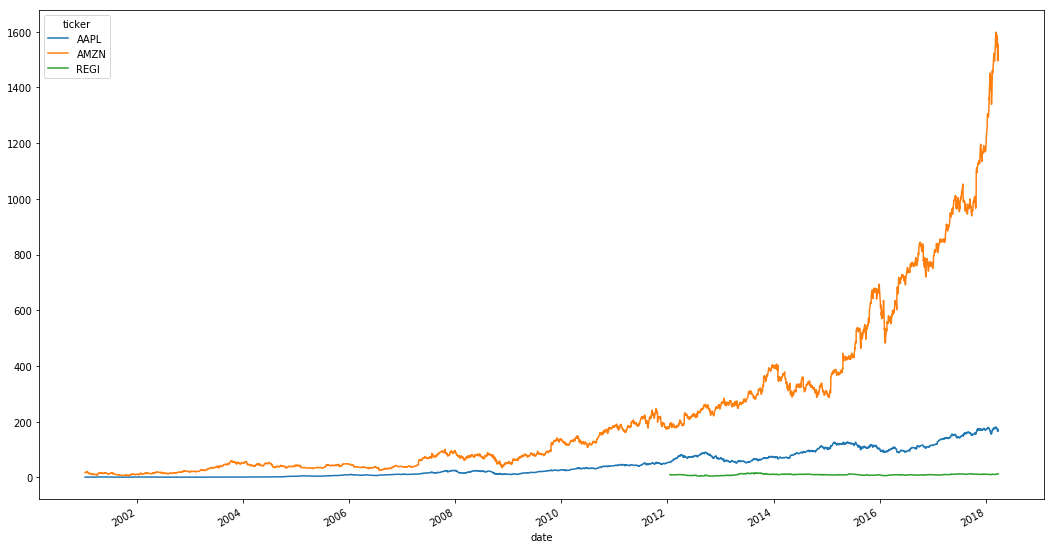

In [10]:
df.plot()

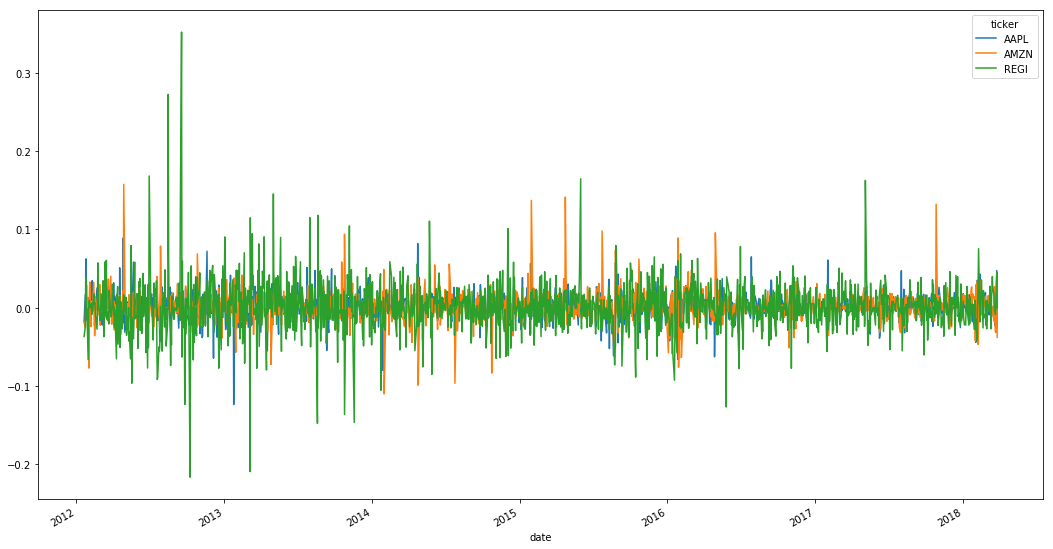

In [11]:
returns_daily = df.pct_change()
returns_daily = returns_daily.dropna()
returns_daily.plot()

In [89]:
returns_daily.std()

ticker
AAPL    0.015777
AMZN    0.018594
REGI    0.032316
dtype: float64

In [90]:
returns_daily.mean()

ticker
AAPL    0.000845
AMZN    0.001485
REGI    0.000660
dtype: float64

In [13]:
returns_daily.aggregate(ret.annualized_volatility)

ticker
AAPL    0.250364
AMZN    0.295077
REGI    0.512843
dtype: float64

In [138]:
# annualized volatility
annualized_volatility = returns_daily.std() * np.sqrt(252)
annualized_volatility

ticker
AAPL    0.250444
AMZN    0.295172
REGI    0.512993
dtype: float64

In [107]:
# total returns
((df.iloc[-1] - df.iloc[0]) / df.iloc[0]) * 100

ticker
AAPL    206.229534
AMZN    669.889432
REGI     25.247525
dtype: float64

In [22]:
returns_daily.aggregate(ret.total_return)

ticker
AAPL    2.062295
AMZN    6.698894
REGI    0.252475
dtype: float64

In [130]:
# total return over all the days
total_daily_return = (returns_daily + 1).prod()
print("total_return", (total_daily_return - 1) * 100)
# return per day
return_per_day = total_daily_return**(1/returns_daily.shape[0]) - 1
print("return per day", (return_per_day) * 100)

total_return ticker
AAPL    206.229534
AMZN    669.889432
REGI     25.247525
dtype: float64
return per day ticker
AAPL    0.072044
AMZN    0.131430
REGI    0.014488
dtype: float64


In [137]:
# annualized returns
annualized_returns = (returns_daily + 1).prod()**(252/returns_daily.shape[0]) - 1
print(annualized_returns)

ticker
AAPL    0.198998
AMZN    0.392339
REGI    0.037181
dtype: float64


In [14]:
returns_daily.aggregate(ret.annualized_returns)

ticker
AAPL    0.198858
AMZN    0.392043
REGI    0.037156
dtype: float64

In [139]:
# returns per unit of risk
annualized_returns / annualized_volatility

ticker
AAPL    0.794580
AMZN    1.329190
REGI    0.072478
dtype: float64

In [141]:
# risk adjusted return
riskfree_rate = 0.03
(annualized_returns - riskfree_rate) / annualized_volatility

ticker
AAPL    0.674793
AMZN    1.227555
REGI    0.013998
dtype: float64

In [18]:
returns_daily.aggregate(ret.risk_adjusted_return)

ticker
AAPL    0.674451
AMZN    1.226943
REGI    0.013954
dtype: float64